In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
np.random.seed(42)

set1no = 900
set2no = 100

In [26]:
df1 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0.0, scale=1.0, size=set1no),
    "feature_2": np.random.normal(loc=0.0, scale=1.0, size=set1no),
    "target": [0] * set1no
})

df2 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0.0, scale=1.0, size=set2no),
    "feature_2": np.random.normal(loc=0.0, scale=1.0, size=set2no),
    "target": [1] * set2no
})

In [27]:
df1.head

<bound method NDFrame.head of      feature_1  feature_2  target
0     0.496714   0.368673       0
1    -0.138264  -0.393339       0
2     0.647689   0.028745       0
3     1.523030   1.278452       0
4    -0.234153   0.191099       0
..         ...        ...     ...
895   0.648710  -0.751969       0
896  -0.167118  -0.319054       0
897   0.146714  -0.796026       0
898   1.206509   1.076007       0
899  -0.816936   0.021312       0

[900 rows x 3 columns]>

In [28]:
df2.head

<bound method NDFrame.head of     feature_1  feature_2  target
0    1.901191   0.696954       1
1   -0.060661  -0.333819       1
2   -0.708407   1.173125       1
3   -1.513714   0.369642       1
4   -1.803140  -0.107302       1
..        ...        ...     ...
95  -0.370011   1.070150       1
96  -0.258796  -0.026521       1
97   1.598647  -0.881875       1
98   0.560919  -0.163067       1
99  -0.295480  -0.744903       1

[100 rows x 3 columns]>

In [29]:
df = pd.concat([df1, df2], ignore_index=True)
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [30]:
df["target"].unique(), df["target"].value_counts()

(array([0, 1]),
 target
 0    900
 1    100
 Name: count, dtype: int64)

In [31]:
df_minority = df[df["target"] == 1]
df_minority

,feature_1,feature_2,target
900,1.901191,0.696954,1
901,-0.060661,-0.333819,1
902,-0.708407,1.173125,1
903,-1.513714,0.369642,1
904,-1.803140,-0.107302,1
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [34]:
df_majority = df[df["target"] == 0]
df_majority

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
895,0.648710,-0.751969,0
896,-0.167118,-0.319054,0
897,0.146714,-0.796026,0
898,1.206509,1.076007,0


In [32]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.utils import resample

In [38]:
df_min_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_min_upsampled

,feature_1,feature_2,target
951,1.775311,1.261922,1
992,-0.436386,1.188913,1
914,-0.268531,-1.801058,1
971,-0.214921,-2.940389,1
960,-0.134309,-0.054894,1
...,...,...,...
952,-1.193637,-0.905732,1
965,-1.662492,0.089581,1
976,-0.562168,1.124113,1
942,-0.548725,0.269127,1


In [40]:
df_upsampled = pd.concat([df_majority, df_min_upsampled])
df_min_upsampled["target"].value_counts()

target
1    900
Name: count, dtype: int64

In [42]:

df_maj_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)
df_maj_downsampled["target"].value_counts()

target
0    100
Name: count, dtype: int64

In [44]:
df_downsampled = pd.concat([df_maj_downsampled, df_minority])
df_downsampled["target"].value_counts()

target
0    100
1    100
Name: count, dtype: int64

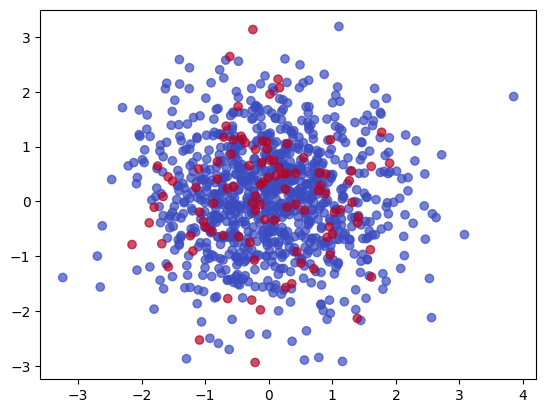

In [45]:
plt.scatter(df["feature_1"], df["feature_2"], c=df["target"], cmap='coolwarm', alpha=0.7)

#   feature_1	--> 0
#   feature_2	--> 1

In [46]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imblearn]


In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
oversample = SMOTE()

In [50]:
(x,y) = oversample.fit_resample(df[["feature_1", "feature_2"]], df["target"])

In [51]:
x

,feature_1,feature_2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,-0.077204,-0.127370
1796,-0.868046,-0.499600
1797,-0.350125,-1.795003
1798,0.556543,-0.159412


In [52]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [58]:
df1=pd.DataFrame(x,columns=['feature_1','feature_2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

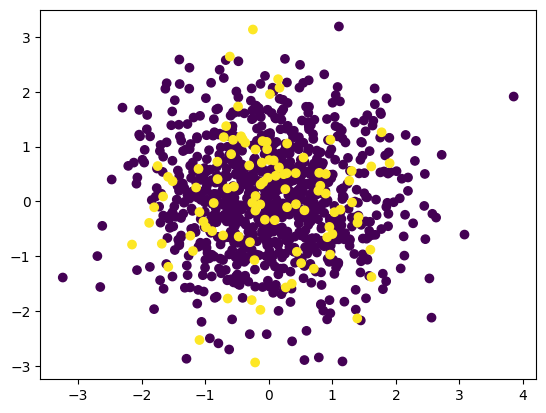

In [59]:
plt.scatter(df['feature_1'],df['feature_2'],c=df['target'])

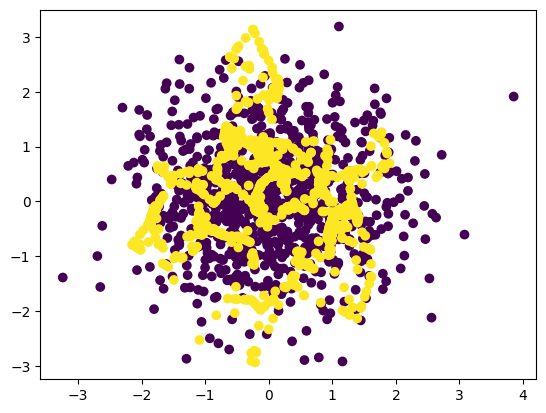

In [61]:

plt.scatter(oversample_df['feature_1'],oversample_df['feature_2'],c=oversample_df['target'])

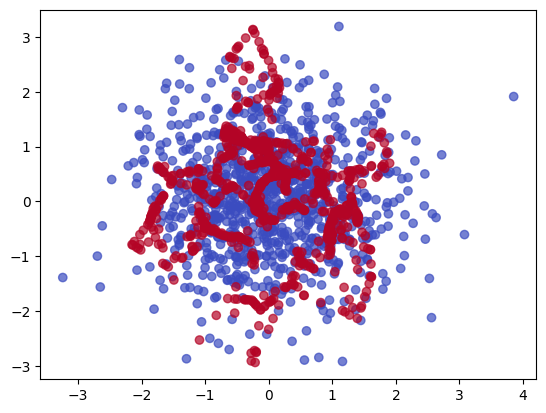

In [62]:
plt.scatter(x["feature_1"], x["feature_2"], c=y, cmap='coolwarm', alpha=0.7)

In [63]:
oversample_df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
1795,-0.077204,-0.127370,1
1796,-0.868046,-0.499600,1
1797,-0.350125,-1.795003,1
1798,0.556543,-0.159412,1


In [64]:
oversample_df['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64